In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
df = pd.read_csv('training_prepped_v1.csv', index_col=0)
df.shape

(809, 132)

In [3]:
df.head(5)

,LotameID,y,operatingSystem,operatingSystemVersion,isMobile,mobileInputSelector,screenResolution,continent,subContinent,onPageTime,...,sub_sec_news,sub_sec_others,sub_sec_politics,sub_sec_region,sub_sec_seismik,sub_sec_sunday-vibes,sub_sec_tennis,sub_sec_world,base_url_https://says.com/,base_url_https://www.nst.com.my/
0,cbb561a1af5a40eb684d55a8c0b2047a,0,False,8,True,True,4,False,True,0,...,0,0,0,0,0,0,0,0,0,0
1,cbb561a1af5a40eb684d55a8c0b2047a,0,False,8,True,True,4,False,True,91472,...,0,0,0,0,0,0,0,0,0,0
2,cbb561a1af5a40eb684d55a8c0b2047a,0,False,8,True,True,4,False,True,103015,...,0,0,0,0,0,0,0,0,0,0
3,e74bb87a1abb30abf105f2900a65e842,1,True,3,False,False,20,False,True,0,...,0,0,0,0,0,0,0,0,0,0
4,e74bb87a1abb30abf105f2900a65e842,1,True,3,False,False,20,False,True,126729,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:,2:]
y = df['y']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (566, 130)
Testing size: (243, 130)


In [6]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

In [8]:
y_pred = rf.predict(X_test)

In [17]:
# metrics

print('R2-score:\t',metrics.r2_score(y_test, y_pred))
print('MAE:\t\t',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:\t\t',metrics.mean_squared_error(y_test, y_pred))

R2-score:	 0.8341104895104895
MAE:		 0.08378600823045267
MSE:		 0.13016296296296295


In [12]:
feat = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

[Text(0, 0, '0.652238'),
 Text(0, 0, '0.130345'),
 Text(0, 0, '0.051537'),
 Text(0, 0, '0.0191833'),
 Text(0, 0, '0.0131765'),
 Text(0, 0, '0.0104736'),
 Text(0, 0, '0.0089334'),
 Text(0, 0, '0.00837125'),
 Text(0, 0, '0.00753879'),
 Text(0, 0, '0.00722817'),
 Text(0, 0, '0.00717381'),
 Text(0, 0, '0.00716203'),
 Text(0, 0, '0.00705881'),
 Text(0, 0, '0.0055569'),
 Text(0, 0, '0.00497167'),
 Text(0, 0, '0.004443'),
 Text(0, 0, '0.00414666'),
 Text(0, 0, '0.00411148'),
 Text(0, 0, '0.00389094'),
 Text(0, 0, '0.00314397')]

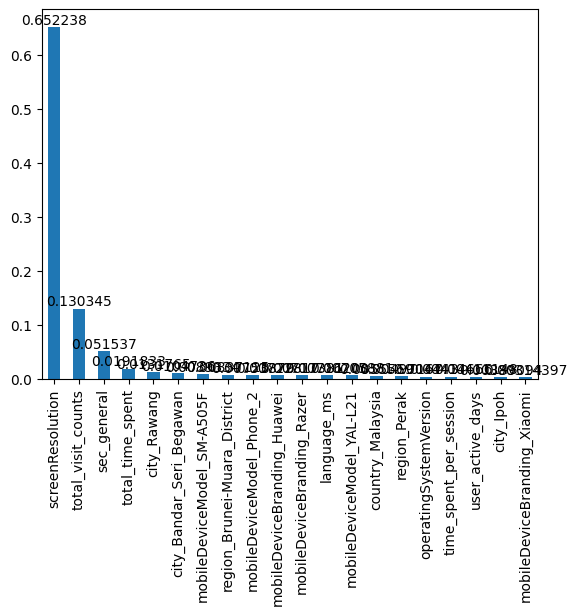

In [18]:
ax = feat.head(20).plot(kind='bar')

ax.bar_label(ax.containers[0])